# Week 3 Day 2: Linearization Methods by Kerk Philips
## Jincheng(Eric) Huang

1. For the Brock and Mirman model in use Uhlig’s notation to analytically find the values of the following matrices: $F, G, H, L, M \& N$ as functions of the parameters. Given these find the values of $P \& Q$, also as functions of the parameters. Imposing our calibrated parameter values, plot the three-dimensional surface plot for the policy function $K'=H(K,z)$.

Solution: The analytical solutions of the matrices are:
$$
\begin{aligned} 
F &=\frac{\alpha \overline{K}^{\alpha-1}}{\overline{K}^{\alpha}-\overline{K}} \\ G &=-\frac{\alpha \overline{K}^{\alpha-1}\left(\alpha+\overline{K}^{\alpha-1}\right)}{\overline{K}^{\alpha}-\overline{K}} \\ H &=\frac{\alpha^{2} \overline{K}^{2(\alpha-1)}}{\overline{K}^{\alpha}-\overline{K}} \\ L &=-\frac{\alpha \overline{K}^{2 \alpha-1}}{\overline{K}^{\alpha}-\overline{K}} \\ M &=\frac{\alpha^{2} \overline{K}^{2(\alpha-1)}}{\overline{K}^{\alpha}-\overline{K}} \\
N &= \rho
\end{aligned}
$$
And given the matrices above, $P \& Q$ can be solved by the equations below:
$$
F P^{2}+G P+H=0 \\
F Q N+(F P+G) Q+(L N+M)=0
$$

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

# Exercise 1

# Linearized (around steady state) policy function
def policy(α, β, ρ, K0, z0):
    Kbar = (α * β)**(1/(1-α))
    F = α*Kbar**(α-1)/(Kbar**α - Kbar)
    G = -α*Kbar**(α-1)*(α+Kbar**(α-1))/(Kbar**α - Kbar)
    H = α**2*Kbar**(2*(α-1))/(Kbar**α - Kbar)
    L = -α*Kbar**(2*α-1)/(Kbar**α - Kbar)
    M = α**2*Kbar**(2*(α-1))/(Kbar**α - Kbar)
    N = ρ
    
    P1 = (-G + np.sqrt(G**2 - 4*F*H))/(2*F)
    P2 = (-G - np.sqrt(G**2 - 4*F*H))/(2*F)
    Q1 = -(L*N + M)/(F*N+F*P1+G)
    Q2 = -(L*N + M)/(F*N+F*P2+G)
    
    K1 = Kbar + P1*(K0 - Kbar) + Q1*z0
    K2 = Kbar + P2*(K0 - Kbar) + Q2*z0
    
    return K1, K2

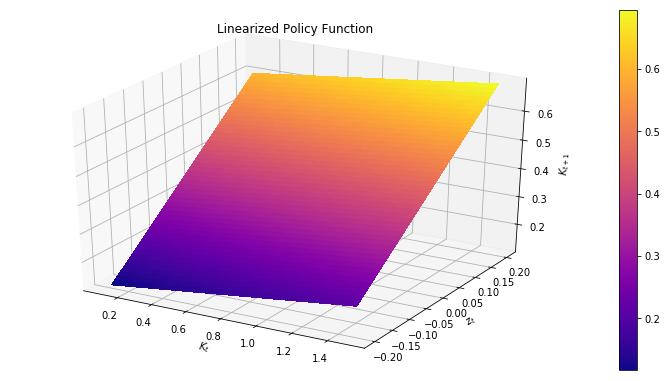

In [2]:
α = 0.35
β = 0.98
ρ = 0.95
σ = 0.02

numpoints = 50
Kmax = 1.5
Kmin = 0.1
zmax = 10 * σ
zmin = -10 * σ
K_grid = np.linspace(Kmin, Kmax, 50)
z_grid = np.linspace(zmin, zmax, 50)

KK, ZZ = np.meshgrid(K_grid, z_grid)

# Generate policy function
policy_value1 = np.zeros((numpoints, numpoints))
policy_value2 = np.zeros((numpoints, numpoints))
for i in range(numpoints):
    policy_value1[i,:] = policy(α, β, ρ, K_grid[i], z_grid)[0]
    policy_value2[i,:] = policy(α, β, ρ, K_grid[i], z_grid)[1]


# Plot the policy function
fig = plt.figure(figsize = (10,5))
ax = Axes3D(fig)
surf = ax.plot_surface(KK, ZZ, policy_value2, cmap='plasma', linewidth=0, antialiased=False)
ax.set_title('Linearized Policy Function')
ax.set_xlabel(r'$K_t$')
ax.set_ylabel(r'$z_t$')
ax.set_zlabel(r'$K_{t+1}$')
fig.colorbar(surf)
plt.show()

2. Repeat the exercise above using $k\equiv \ln K$ in place of $K$ as the endogenous state variable

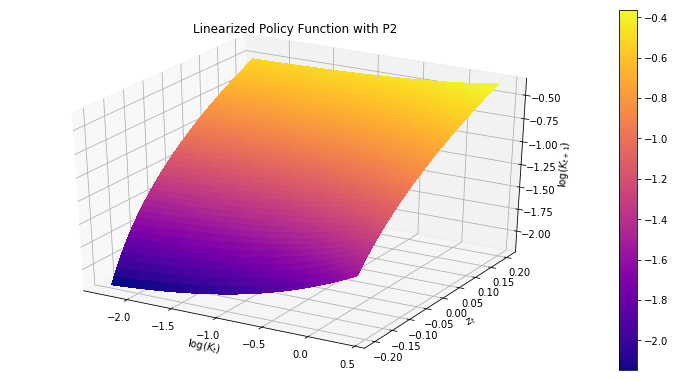

In [5]:
# Exercise 2
policy_value1 = np.zeros((numpoints, numpoints))
policy_value2 = np.zeros((numpoints, numpoints))
# Generate policy function (K might <0 due to linear interpolation. Take abs value before taking log)
for i in range(numpoints):
    policy_value1[i,:] = np.sign(policy(α, β, ρ, K_grid[i], z_grid)[0]) * np.log(abs((policy(α, β, ρ, K_grid[i], z_grid)[0])))
    policy_value2[i,:] = np.sign(policy(α, β, ρ, K_grid[i], z_grid)[1]) * np.log(abs((policy(α, β, ρ, K_grid[i], z_grid)[1])))

logK_grid = np.log(K_grid)
KK, ZZ = np.meshgrid(logK_grid, z_grid)

fig = plt.figure(figsize = (10,5))
ax = Axes3D(fig)
surf = ax.plot_surface(KK, ZZ, policy_value2, cmap='plasma', linewidth=0, antialiased=False)
ax.set_title('Linearized Policy Function with P2')
ax.set_xlabel(r'$\log(K_t)$')
ax.set_ylabel(r'$z_t$')
ax.set_zlabel(r'$\log(K_{t+1})$')
fig.colorbar(surf)
plt.show()

3. Do the necessary tedious matrix algebra to transform equation (5) in the notes into (8).

Solution: From the characterizing equations and definitions of matrices, we get from first order approximation that 
$$
E_{t}\left\{F \tilde{X}_{t+1}+G \tilde{X}_{t}+H \tilde{X}_{t-1}+L \tilde{Z}_{t+1}+M \tilde{Z}_{t}\right\}=0
$$
In addition, we approximate the policy function linearly by 
$$
\tilde{X}_{t}=P \tilde{X}_{t-1}+Q \tilde{Z}_{t}
$$
and the law of motion for the exogenous state variable is
$$
\tilde{Z}_{t}=N \tilde{Z}_{t-1}+\varepsilon_{t}
$$
Substituting the policy function into the first equation, we have
$$
\begin{array}{r}{E_{t}\left\{F\left(P\left(P \tilde{X}_{t-1}+Q \tilde{Z}_{t}\right)+Q\left(N \tilde{Z}_{t}+\varepsilon_{t}\right)\right)+G\left(P \tilde{X}_{t-1}+Q \tilde{Z}_{t}\right)+\right.} {H \tilde{X}_{t-1}+L\left(N \tilde{Z}_{t}+\varepsilon_{t}\right)+M \tilde{Z}_{t} \}=0}\end{array}
$$
Since every random variable is evaluated at time $t$ or before, we can eliminate the expectation sign. Simplifying, we get
$$
\begin{array}{r}{F P P \tilde{X}_{t-1}+F P Q \tilde{Z}_{t}+P Q N \tilde{Z}_{t}+G P \tilde{X}_{t-1}+G Q \tilde{Z}_{t}+} {H \tilde{X}_{t-1}+L N \tilde{Z}_{t}+M \tilde{Z}_{t}=0}\end{array}
$$
Simplifying further, we get 
$$
[(F P+G) P+H] \tilde{X}_{t-1}+[(F Q+L) N+(F P+G) Q+M] \tilde{Z}_{t}=0
$$

4. For the baseline tax model, find the steady state values of $k, c, r, w, \ell, T, y$ and $i$, numerically. Assuming $u\left(c_{t}, \ell_{t}\right)=\frac{c_{t}^{1-\gamma}-1}{1-\gamma}+a \frac{\left(1-\ell_{t}\right)^{1-\xi}-1}{1-\xi}$ and $F\left(K_{t}, L_{t}, z_{t}\right)=K_{t}^{\alpha}\left(L_{t} e^{z_{t}}\right)^{1-\alpha}$. Use the following parameter values: $\gamma=2.5, \xi=1.5, \beta=.98, \alpha=.40, a=.5, \delta=.10, \bar{z} = 0, \rho_z = .9$ and $\tau = .05$.

Solution: The setup is the same as exercise 5 in Problem set 1. Duplicating the code below:

In [7]:
uc6 = lambda c, γ: c**(-γ)
ul6 = lambda c, γ, l: - a * (1 - l)**(-ϵ)
r6 = lambda α, k, l: α * k**(α - 1) * l**(1 - α)
w6 = lambda α, k, l: (1-α) * k**α * l**(- α)
T6 = lambda τ, w, r, δ, k, l: τ * (w * l + (r - δ) * k)
output = lambda k,l,z: k**α*(l*np.exp(z))**(1-α)
investment = lambda k: k - (1-δ)*k

def funcs_6(x):
    c,k,l = x[0],x[1],x[2]
    
    r = r6(α, k, l)
    w = w6(α, k, l)
    uc = uc6(c, γ)
    ul = ul6(c, γ, l)
    T = T6(τ, w, r, δ, k, l)
    
    f1 = c - (w*l + (r-δ)*k)
    f2 = uc - β * uc * ((r-δ)*(1.-τ)+1.)
    f3 = -ul - uc * w * (1.-τ) 
    return (f1, f2, f3)
    
γ = 2.5
ϵ = 1.5
β = 0.98
α = 0.4
a = 0.5
δ = 0.1
τ = 0.05
z = 0

c, k, l = optimize.fsolve(funcs_6, (0.5, 1, 0.5))
r = r6(α, k, l)
w = w6(α, k, l)
uc = uc6(c, γ)
ul = ul6(c, γ, l)
T = T6(τ, w, r, δ, k, l)
y = output(k,l,0)
i = investment(k)
print('Steay state value of k is: %1.4f ' % k)
print('Steay state value of c is: %1.4f ' % c)
print('Steay state value of r is: %1.4f ' % r)
print('Steay state value of w is: %1.4f ' % w)
print('Steay state value of l is: %1.4f ' % l)
print('Steay state value of T is: %1.4f ' % T)
print('Steay state value of y is: %1.4f ' % y)
print('Steay state value of i is: %1.4f ' % i)

Steay state value of k is: 4.2252 
Steay state value of c is: 0.8607 
Steay state value of r is: 0.1215 
Steay state value of w is: 1.3280 
Steay state value of l is: 0.5798 
Steay state value of T is: 0.0430 
Steay state value of y is: 1.2832 
Steay state value of i is: 0.4225 


5. For the same model as above, find $\frac{\partial y}{\partial x}$ for $y \in\{\overline{k}, \overline{c}, \overline{r}, \overline{w}, \overline{\ell}, \overline{T}, \overline{y}, \overline{i}\}$ and $x \in \{\delta, \tau, \overline{z}, \alpha, \gamma, \xi, \beta, a\}$ using numerical techniques.

In [8]:
import autograd.numpy as np
from autograd import grad

# same fucntions as in exercise 6 but rewrite here using autograd version of numpy
uc7 = lambda c, γ: c**(-γ)
ul7 = lambda c, γ, l: - a * (1 - l)**(-ϵ)
r7 = lambda α, k, l: α * k**(α - 1) * l**(1 - α)
w7 = lambda α, k, l: (1-α) * k**α * l**(- α)
T7 = lambda τ, w, r, δ, k, l: τ * (w * l + (r - δ) * k)
output = lambda k,l,z: k**α*(l*np.exp(z))**(1-α)
investment = lambda k: k - (1-δ)*k

r = r6(α, k, l)
w = w6(α, k, l)
uc = uc6(c, γ)
ul = ul6(c, γ, l)
T = T6(τ, w, r, δ, k, l)
y = output(k,l,0)
i = investment(k)

# use numerical diff, i.e. (f(x+ϵ) - f(x))/2ϵ
import autograd.numpy as np
from autograd import grad

def funcs_7(x):
    c,k,l = x[0],x[1],x[2]
    
    r = r6(α, k, l)
    w = w6(α, k, l)
    uc = uc6(c, γ)
    ul = ul6(c, γ, l)
    T = T6(τ, w, r, δ, k, l)
    
    f1 = c - (w*l + (r-δ)*k)
    f2 = uc - β * uc * ((r-δ)*(1.-τ)+1.)
    f3 = -ul - uc * w * (1.-τ) 
    return (f1, f2, f3)
    
γ = 2.5
ϵ = 1.5
β = 0.98
α = 0.4
a = 0.5
δ = 0.1
τ = 0.05
z = 0

c, k, l = optimize.fsolve(funcs_7, (0.5, 1, 0.5))
r = r6(α, k, l)
w = w6(α, k, l)
uc = uc6(c, γ)
ul = ul6(c, γ, l)
T = T6(τ, w, r, δ, k, l)
y = output(k,l,0)
i = investment(k)

r_α = grad(r6, 0)
r_k = grad(r6, 1)
r_l = grad(r6, 2)
print('dr/dα: %1.4f'% r_α(α, k, l))

dr/dα: 0.5450


6. For the same model as above, let $X_{t}=\left\{k_{t-1}, \ell_{t-1}\right\}$. Find the values of $F, G, H, L, M, N, P$ and $Q$.

Solution: First, some useful functions below:

In [9]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.optimize as opt
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve

def Modeldefs(Xp, X, Y, Z, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns explicitly defined
    values for consumption, gdp, wages, real interest rates, and transfers
    
    Inputs are:
        Xp: value of capital in next period
        X: value of capital this period
        Y: value of labor this period
        Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Y: GDP
        w: wage rate
        r: rental rate on capital
        T: transfer payments
        c: consumption
        u: utiity
    '''
    
    # unpack input vectors
    kp = Xp
    k = X
    l = Y
    z = Z
    
    # find definintion values
    Y = k**α * (l * np.exp(z))**(1-α)
    w = (1-α) * k**α * l**(- α) * np.exp(z)**(1-α) 
    r = α * Y / k
    T = τ * (w * l + (r - δ) * k)
    c = (1 - τ) * (w * l + (r - δ) * k) + k + T - kp
    u = (c**(1-γ) - 1) / (1-γ) + a * (np.sign(1 - l)*np.abs(1-l)**(1-ϵ) - 1)/(1-ϵ)
    
    return Y, w, r, c, u

In [10]:
def Modeldyn(theta0, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns values from the
    characterizing Euler equations.
    
    Inputs are:
        theta: a vector containng (Xpp, Xp, X, Yp, Y, Zp, Z) where:
            Xpp: value of capital in two periods
            Xp: value of capital in next period
            X: value of capital this period
            Yp: value of labor in next period
            Y: value of labor this period
            Zp: value of productivity in next period
            Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Euler: a vector of Euler equations written so that they are zero at the
            steady state values of X, Y & Z.  This is a 2x1 numpy array. 
    '''
    
    # unpack theat0
    (Xpp, Xp, X, Yp, Y, Zp, Z) = theta0
    l = Y
    
    γ, ϵ, β, α, a, δ, τ = params
    
    # find definitions for now and next period
    Y, w, r, c, u = Modeldefs(Xp, X, Y, Z, params)
    Yp, wp, rp, cp, up = Modeldefs(Xpp, Xp, Yp, Zp, params)
    
    # Evaluate Euler equations
    
    E1 = (c**(-γ))-β*(cp**(-γ))*((1-τ)*(rp-δ)+1)
    E2 = a*(np.sign(1-l) * np.abs(1-l)**(-ϵ)) - w*(1-τ)*(c**(-γ))
    
    return np.array([E1, E2])

In [11]:
γ = 2.5
ϵ = 1.5
β = 0.98
α = 0.4
a = 0.5
δ = 0.1
τ = 0.05
params = (γ, ϵ, β, α, a, δ, τ)

Zbar = np.array([0.])
nx = 1
ny = 1
nz = 1
logX = 0
Sylv = 0

# take a guess for steady state values of k and ell
guessXY = np.array([4, 0.5])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
(kbar, lbar) = XYbar
print ('XYbar: ', XYbar)

XY = [kbar,lbar]
# set up steady state input vector
theta0 = np.array([kbar, kbar, kbar, lbar, lbar, 0., 0.])

# check SS solution
check = Modeldyn(theta0, params)
print ('check: ', check)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')

XYbar:  [4.22522903 0.57979145]
check:  [ 7.10542736e-15 -5.55111512e-14]


In [12]:
Ybar, wbar, rbar, cbar, ubar = Modeldefs(kbar, kbar, lbar, 0, params)
T7 = lambda τ, w, r, δ, k, l: τ * (w * l + (r - δ) * k)
print ('Ybar: ', Ybar)
print ('wbar: ', wbar)
print ('rbar: ', rbar)
print ('cbar: ', cbar)
print ('ubar: ', ubar)
print ('Tbar: ', T7(τ, wbar, rbar, δ, kbar, lbar))

Ybar:  1.283226108832618
wbar:  1.3279527683513437
rbar:  0.12148227712136966
cbar:  0.860703206154203
ubar:  -0.7108726381177591
Tbar:  0.04303516030771015


In [13]:
# find the derivatives matrices
# seems some changes have been made to the LinApp_Deriv and LinApp_Solve and they now return less matrices.
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM] = \
    LinApp_Deriv(Modeldyn, params, theta0, nx, ny, nz, logX) # 13 matrices in example, but now only 11
print('FF: ', FF)
print('GG: ', GG)
print('HH: ', HH)
print('LL: ', LL)
print('MM: ', MM)

ρ = 0.9
# set value for NN    
NN = ρ
print('NN:', NN)
    
# find the policy and jump function coefficients
PP, QQ, RR, SS = \
    LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,NN,Zbar,Sylv) # 6 matrices in example, but now only 4
print ('PP:',PP)
print ('QQ', QQ)
print ('RR:',RR)
print ('SS', SS)

FF:  [[0.]]
GG:  [[-5.331621]]
HH:  [[5.27238332]]
LL:  [[0.]]
MM:  [[3.00365877]]
NN: 0.9
PP: [[0.35542591]]
QQ [[0.32363508]]
RR: [[-0.22668714]]
SS [[-0.08578888]]


7. For the same model, generate 10,000 artificial time series for an economy where each time series is 250 periods long. Start each simulation off with a starting value for $k$ equal to the steady state value, and a value of $z=0$.
Use $\sigma_{z}^{2}=.0004$. For each simulation save the time-series for GDP, consumption, investment, and the labor input. When all 10,000 simulations have finished generate a graph for each of these time-series showing the average value over the simulations for each period, and also showing the five and ninety-five percent confidence bands for each series each period.

In [15]:
from numpy import random
from LinApp_SSL import LinApp_SSL

σ = 0.02
ZZ = []
nobs = 250
def one_simulation(i, params):
    ZZ = []
    KK = [kbar]
    random.seed(i)
    shock = σ * 6 * random.random(250) - 3 * σ
    for j in range(250):
        if j == 0:
            zp = (1-ρ) * 0 + ρ * 0 + shock[j]
        else:
            zp = (1-ρ) * 0 + ρ * ZZ[j-1] + shock[j]
        ZZ.append(zp)
    Zhist = np.hstack((np.array([0]), (np.array(ZZ))))
    zhist = np.reshape(Zhist,(nobs+1,1))
    
    k0 = np.array([[kbar]])
    l0 = np.array([[lbar]])

    # create a history of k's and ell's using LinApp_SSL
    khist, lhist =  LinApp_SSL(k0, zhist, XYbar, logX, PP, QQ, RR, SS)
    
    # create histories of remaining variables
    Yhist = np.zeros(nobs)
    whist = np.zeros(nobs)
    rhist = np.zeros(nobs)
    chist = np.zeros(nobs)
    ihist = np.zeros(nobs)
    uhist = np.zeros(nobs)
    for t in range(0,nobs):
        Yhist[t], whist[t], rhist[t], chist[t], uhist[t] = \
        Modeldefs(khist[t+1], khist[t], lhist[t], zhist[t], params)
    
    # delete last observation
    khist = khist[0:nobs]
    zhist = zhist[0:nobs]
    lhist = lhist[0:nobs]
    ihist = Yhist - chist
    
    return khist, lhist, zhist, Yhist, whist, rhist, chist, ihist, uhist

In [16]:
# Generate 10000 simulations
nsims = 10000
llhist = np.zeros((nsims, 250))
YYhist = np.zeros((nsims, 250))
cchist = np.zeros((nsims, 250))
iihist = np.zeros((nsims, 250))
for i in range(nsims):
    khist, lhist, zhist, Yhist, whist, rhist, chist, ihist, uhist = one_simulation(i, params)
    lhist = lhist.reshape(250)
    Yhist = Yhist.reshape(250)
    chist = chist.reshape(250)
    ihist = ihist.reshape(250)
    llhist[i] = lhist
    YYhist[i] = Yhist
    cchist[i] = chist
    iihist[i] = ihist
meanlhist = np.mean(llhist, axis = 0)
meanYhist = np.mean(YYhist, axis = 0)
meanchist = np.mean(cchist, axis = 0)
meanihist = np.mean(iihist, axis = 0)

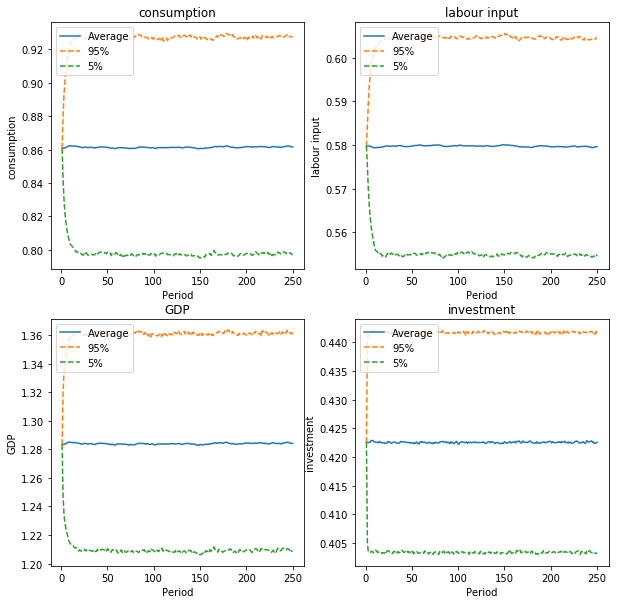

In [17]:
def plot_hist(ax, title, hist):
    x = np.arange(1, 251, 1)
    percent95 = np.percentile(hist, 95, axis=0)
    percent5 = np.percentile(hist, 5, axis=0)
    av = np.mean(hist, axis=0)
    ax.plot(x, av, label='Average')
    ax.plot(x, percent95, '--', label='95%')
    ax.plot(x, percent5, '--', label='5%')
    ax.set_xlabel('Period')
    ax.set_ylabel(title)
    ax.set_title(title)
    ax.legend(loc = 'upper left')
    
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2,figsize = (10,10))
plot_hist(ax1, 'consumption', cchist)
plot_hist(ax2, 'labour input', llhist)
plot_hist(ax3, 'GDP', YYhist)
plot_hist(ax4, 'investment', iihist)


8. For the same model as above, calculate: the mean, volatility (standard deviation), coefficient of variation (mean divided by standard deviation), relative volatility (standard deviation divided bu the standard deviation of output), persistence (autocorrelation), and cyclicality (correlation with output); for each series over each simulation and report the average values and standard errors for these moments over the 10,000 simulations.

In [18]:
# For the sake of time, use 250 simulations to calculate the quantities of interest
from scipy import stats

llhist = np.zeros((nsims, 250))
YYhist = np.zeros((nsims, 250))
cchist = np.zeros((nsims, 250))
iihist = np.zeros((nsims, 250))
kkhist = np.zeros((nsims, 250))
zzhist = np.zeros((nsims, 250))
wwhist = np.zeros((nsims, 250))
rrhist = np.zeros((nsims, 250))
uuhist = np.zeros((nsims, 250))
for i in range(nsims):
    khist = khist.reshape(250)
    lhist = lhist.reshape(250)
    Yhist = Yhist.reshape(250)
    chist = chist.reshape(250)
    ihist = ihist.reshape(250)
    zhist = zhist.reshape(250)
    whist = whist.reshape(250)
    rhist = rhist.reshape(250)
    uhist = uhist.reshape(250)
    kkhist[i] = khist
    llhist[i] = lhist
    YYhist[i] = Yhist
    cchist[i] = chist
    iihist[i] = ihist
    zzhist[i] = zhist
    wwhist[i] = whist
    rrhist[i] = rhist
    uuhist[i] = uhist

def mean(hist):
    return np.mean(hist, axis = 1)

def SD(hist):
    return np.std(hist, axis = 1)

def coeffi_var(hist):
    return mean(hist)/SD(hist)

def relative_vol(hist):
    return SD(hist)/SD(YYhist)

def persist(hist, t=1): # an online function that computes autocorrelation
    persistence = []
    for i in range(nsims):
        autocorr = np.corrcoef(np.array([hist[i][0:len(hist[i])-1], hist[i][1:len(hist[i])]]))[0,1]
        persistence.append(autocorr)   
    return persistence

def cyclicality(hist):
    cov = []
    for i in range(nsims):
        covar = np.corrcoef(np.array([hist[i], YYhist[i]]))[0,1]
        cov.append(covar)   
    return cov

hists = (kkhist, llhist, YYhist, cchist, iihist, zzhist, wwhist, rrhist, uuhist)
names = ('Capital', 'Labour input', 'GDP(output)', 'Consumption', 'Investment', 'shock', 
         'marginal return of labour = wage', 'marginal return of capital = rent', 'utility')
for i in range(len(hists)):
    hist = hists[i]
    print(names[i])
    print('Mean = {} with standard error {}'.format(np.mean(mean(hist)),stats.sem(mean(hist))))
    print('Standard deviation = {} with standard error {}'.format(np.mean(SD(hist)),stats.sem(SD(hist))))
    print('Coefficient of variation = {} with standard error {}'.format(np.mean(coeffi_var(hist)),stats.sem(coeffi_var(hist))))
    print('Relative volatility = {} with standard error {}'.format(np.mean(relative_vol(hist)),stats.sem(relative_vol(hist))))
    print('Persistence = {} with standard error {}'.format(np.mean(persist(hist)),stats.sem(persist(hist))))
    print('Cyclicality = {} with standard error {}'.format(np.mean(cyclicality(hist)),stats.sem(cyclicality(hist))))
    print('===================================================================================================')

Capital
Mean = 4.208215753494884 with standard error 8.882228319520568e-18
Standard deviation = 0.031960532249923394 with standard error 6.939240874625444e-20
Coefficient of variation = 131.66913869229987 with standard error 0.0
Relative volatility = 0.8274190585187795 with standard error 2.220557079880142e-18
Persistence = 0.9377907068735127 with standard error 1.110278539940071e-18
Cyclicality = 0.8180933927242671 with standard error 2.220557079880142e-18
Labour input
Mean = 0.5865716226973321 with standard error 0.0
Standard deviation = 0.012524309261374454 with standard error 5.2044306559690836e-20
Coefficient of variation = 46.834648558731004 with standard error 7.105782655616455e-17
Relative volatility = 0.3242390363404951 with standard error 5.551392699700355e-19
Persistence = 0.9564788142628394 with standard error 3.3308356198202135e-18
Cyclicality = -0.9301854258198471 with standard error 2.220557079880142e-18
GDP(output)
Mean = 1.2644191544402053 with standard error 4.4411141

9. For the same model as above, generate impulse response functions for : GDP, consumption, investment and total labor input; with lags from 0 to 40 periods.

For the IRF plot, we assume that the shock happens at period 10. We plot the IRF from period 0 to 50.

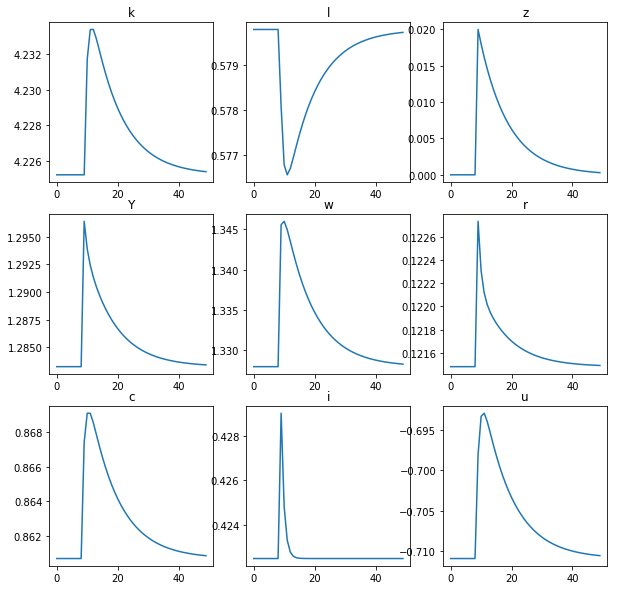

In [19]:
nobs = 50 

# create a history of z's using equation (7)
zhist = np.zeros(nobs+1)
epshist = np.zeros(nobs+1)
epshist[9] = σ
zhist[0] = 0
for t in range(1,nobs+1):
    zhist[t] = ρ*zhist[t-1] + epshist[t]
    
# LinApp_SSL requires that Zhist be a 2-dimensional array
Zhist = np.reshape(zhist, (nobs+1, 1))

# Linapp_SSL also requires that starting values be arrays
k0 = np.array([[kbar]])
l0 = np.array([[lbar]])

# create a history of k's and ell's using LinApp_SSL
khist, lhist =  LinApp_SSL(k0, Zhist ,XYbar, logX, PP, QQ, RR, SS)

# create histories of remaining variables
Yhist = np.zeros(nobs)
whist = np.zeros(nobs)
rhist = np.zeros(nobs)
chist = np.zeros(nobs)
ihist = np.zeros(nobs)
uhist = np.zeros(nobs)
for t in range(0,nobs):
    Yhist[t], whist[t], rhist[t], chist[t], uhist[t] = \
        Modeldefs(khist[t+1], khist[t], lhist[t], zhist[t], params)
        
# delete last observation
khist = khist[0:nobs]
zhist = zhist[0:nobs]
lhist = lhist[0:nobs]
ihist = Yhist - chist
# plot time series
time = range(0, nobs)

fig,ax = plt.subplots(3, 3, figsize = (10, 10))
# plt.subplot(3,3,1)
ax[0,0].plot(time, khist, label='k')
ax[0,0].set_title('k')
# plt.subplot(3,3,2)
ax[0,1].plot(time, lhist, label='l')
ax[0,1].set_title('l')
# plt.subplot(3,3,3)
ax[0,2].plot(time, zhist, label='z')
ax[0,2].set_title('z')
# plt.subplot(3,3,4)
ax[1,0].plot(time, Yhist, label='Y')
ax[1,0].set_title('Y')
# plt.subplot(3,3,5)
ax[1,1].plot(time, whist, label='w')
ax[1,1].set_title('w')
# plt.subplot(3,3,6)
ax[1,2].plot(time, rhist, label='r')
ax[1,2].set_title('r')
# plt.subplot(3,3,7)
ax[2,0].plot(time, chist, label='c')
ax[2,0].set_title('c')
# plt.subplot(3,3,8)
ax[2,1].plot(time, ihist, label='i')
ax[2,1].set_title('i')
# plt.subplot(3,3,9)
ax[2,2].plot(time, uhist, label='u')
ax[2,2].set_title('u')
plt.show()